In [24]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [25]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 8.76MB/s]


In [34]:
!unzip \*.zip && rm *.zip

Archive:  heart-disease-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Perform exploratory data analysis
print(data.head())
print(data.info())
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [28]:
# Handle missing values
data = data.dropna()

# Convert categorical variables to numeric
data['target'] = data['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})


In [29]:
# Selecting features for analysis
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = data[features]
y = data['target']


In [39]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [40]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Initialize NearestNeighbors to estimate local density
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10)
nn.fit(X_train)

# Compute distances and indices of the k-neighbors for each point
distances, indices = nn.kneighbors(X_train)

# Compute adaptive k for each point
ak = np.mean(distances, axis=1)


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



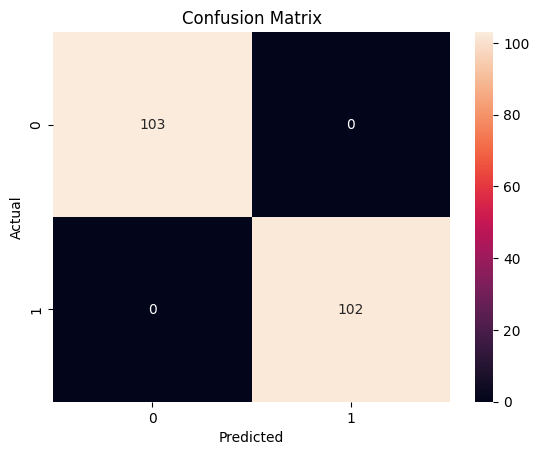

In [42]:
# Initialize Adaptive KNN classifier
from sklearn.neighbors import KNeighborsClassifier

aknn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model
aknn.fit(X_train, y_train)

# Predictions
y_pred = aknn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()
